In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Settig graph visual preferences
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [3]:
#Load in data set
adult_df = pd.read_csv('adult.csv', header = None) #Since the data set didn't come with header (column names)
adult_df.columns =  ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                     'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'
                     ,'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Gather information about the data set
adult_df.info()

#The data set contains no null value but has multiple non-numerical objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Keeping track of categorical column names and numerical column names
categorical_col = []
numerical_col = []
for column in adult_df:
    if isinstance(adult_df[column][0], str):
        categorical_col.append(column)
    else:
        numerical_col.append(column)
        
print(categorical_col)
print(numerical_col)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [7]:
#Now we can easily access either categorical or numerical columns all at the same time
adult_df[categorical_col].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [8]:
adult_df[numerical_col].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


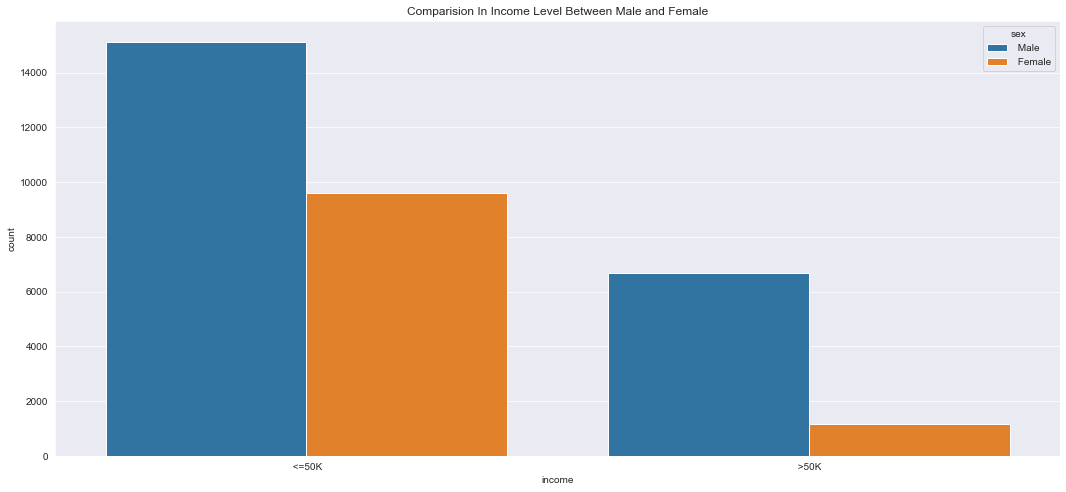

In [9]:
#Compare between the income between two sex
sns.countplot(x = adult_df['income'], hue = 'sex', data = adult_df)
plt.title('Comparision In Income Level Between Male and Female')
plt.show()

#According to the data, the number of men who make more than 50k quadruple the number of women who make more than 50k

Text(0.5, 1.0, 'Female Income Percentage')

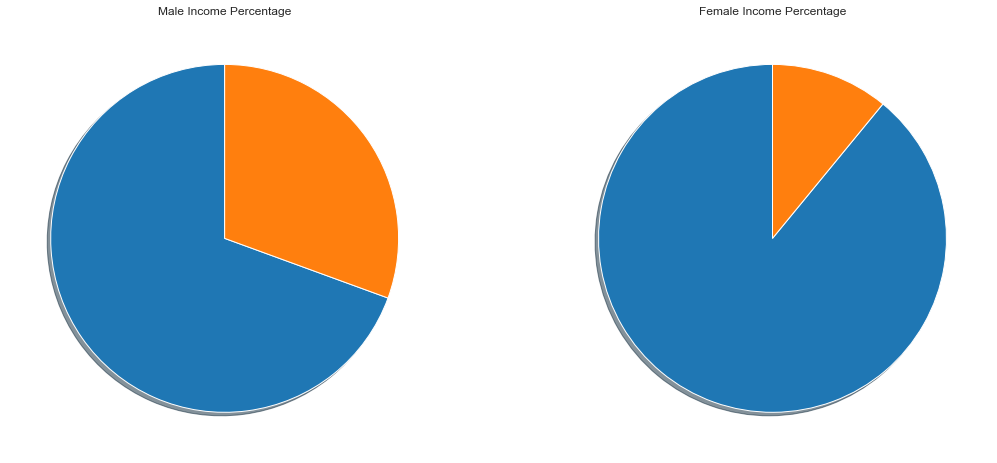

In [10]:
#We can observe the diffence further in a pie chart
#men_income = adult_df.query("income == '<=50K'")
male_income = adult_df[adult_df['sex'] == ' Male']['income'] #Most stupid thing I have ever seen, there is a space before Male
                                                                # and Female which took me hours to figure out
female_income = adult_df[adult_df['sex'] == ' Female']['income']

fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].pie(male_income.value_counts().values, shadow = True, startangle = 90)
axes[0].set_title('Male Income Percentage')

axes[1].pie(female_income.value_counts().values, shadow = True, startangle = 90)
axes[1].set_title('Female Income Percentage')

#From the graph we can see that the percentage of men having >50k is much more than women >50k

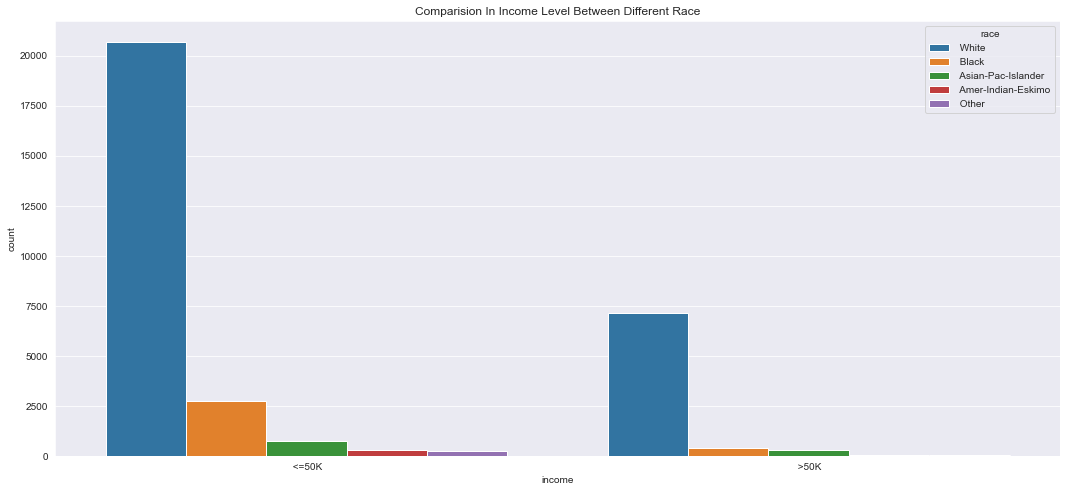

In [11]:
#Compare between the income between races
sns.countplot(x = adult_df['income'], hue = 'race', data = adult_df)
plt.title('Comparision In Income Level Between Different Race')
plt.show()

#According to the chart below, while the number of white people who make more than 50k is way more than other races,
# the same can be said for under 50k => Most of the people in the survey are white and might not be a good idea to based our
# analysis on.

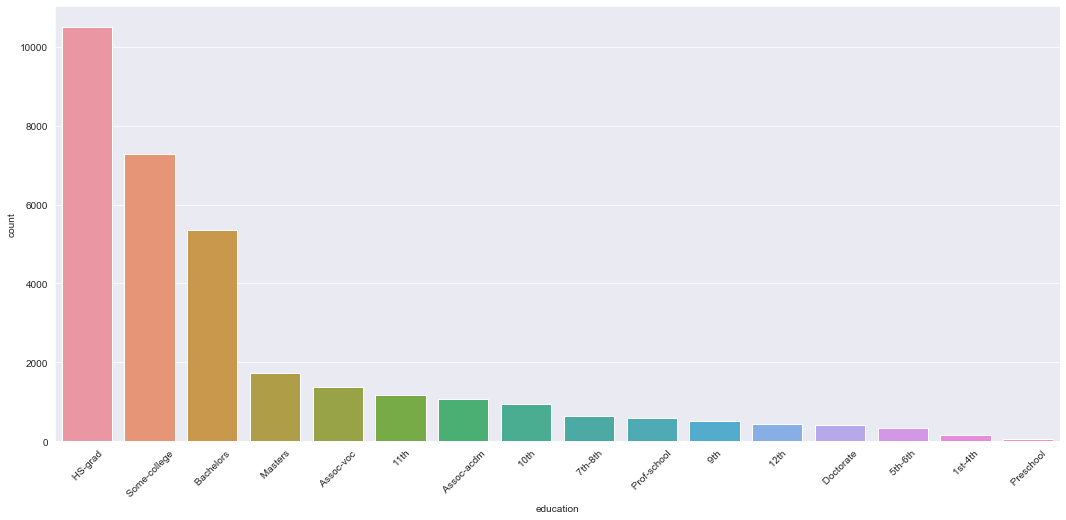

In [12]:
#We can look at education level as well
# order parameter helps sort from largest to smallest

sns.countplot(x = adult_df['education'], order = adult_df['education'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

#Most people from the data set are high school graduates or college graduates

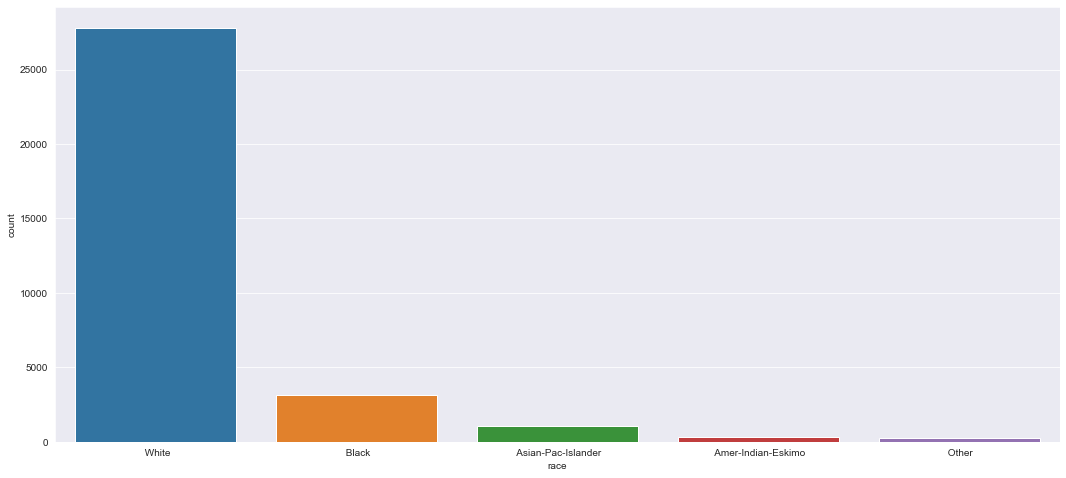

In [13]:
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

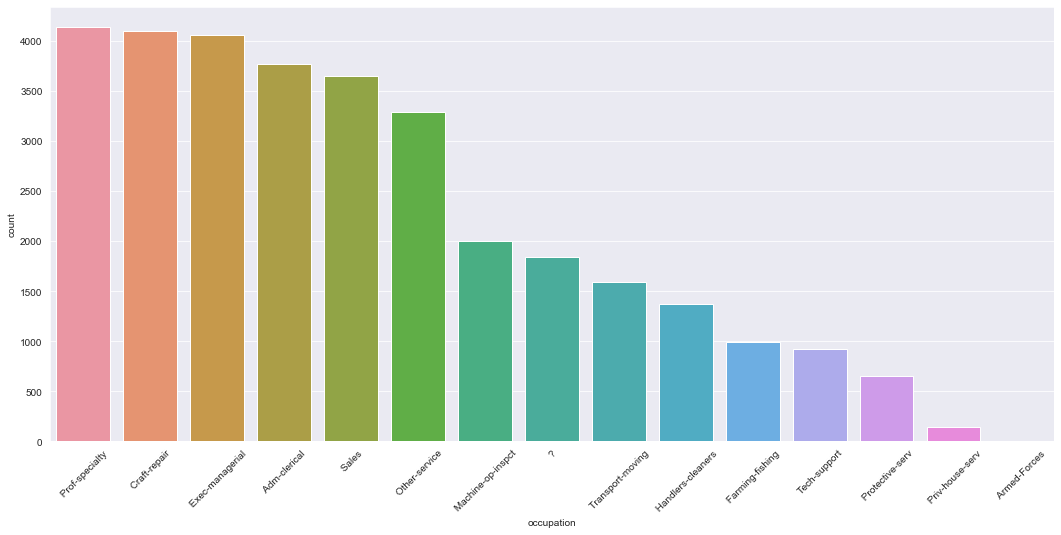

In [14]:
#We can use the same method to see occupation
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

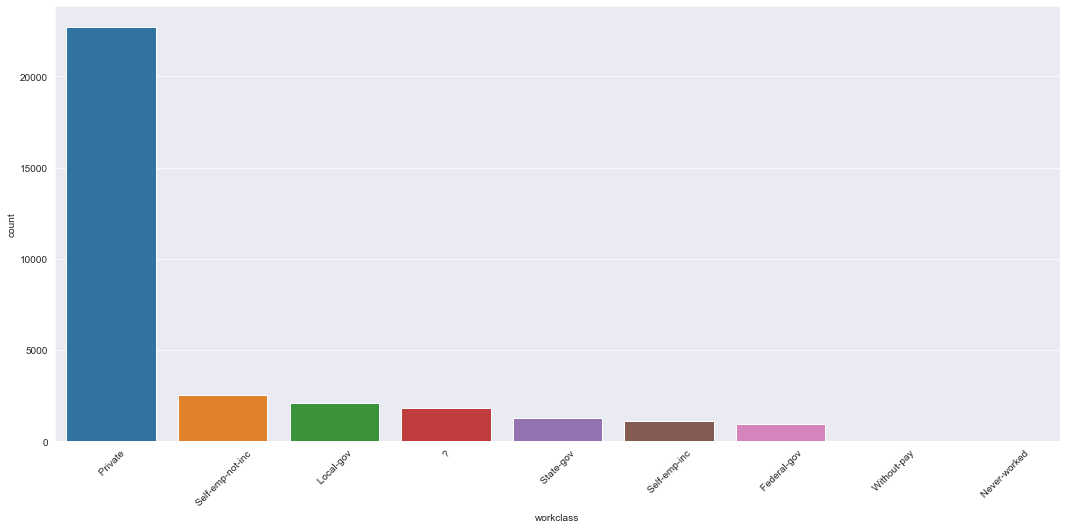

In [15]:
#or workclass
sns.countplot(x=adult_df['workclass'], data=adult_df, order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()
#Vast majority of people are working in private companies

In [16]:
#Since there are quite a lot of people within workclass, occupation, and native country that has ? mark values, we need to 
# replace them with NaN

adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

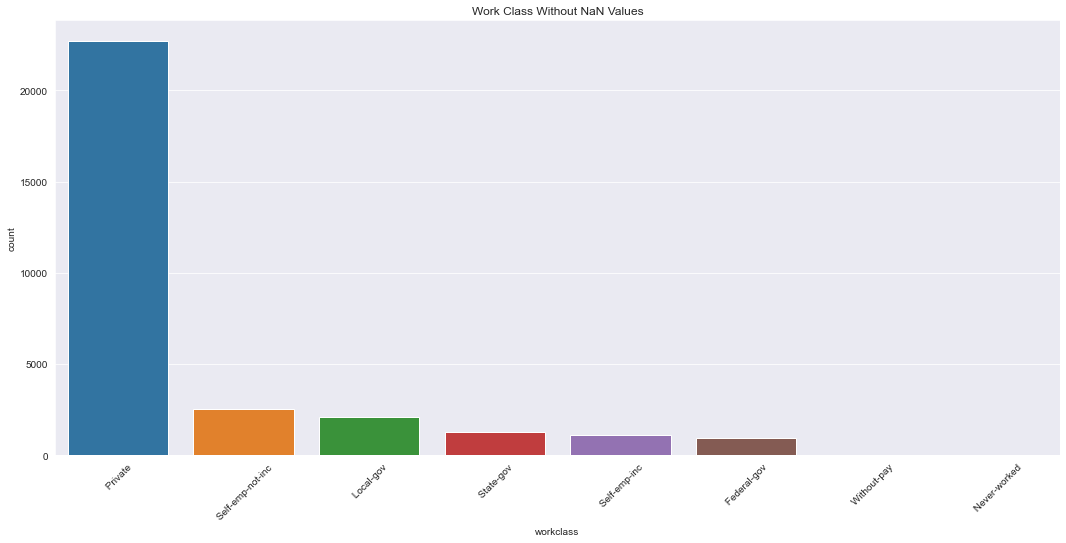

In [17]:
#Calling the same graph again to check
sns.countplot(x=adult_df['workclass'], data=adult_df, order=adult_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Work Class Without NaN Values')
plt.show()

#The NaN values have been eliminated

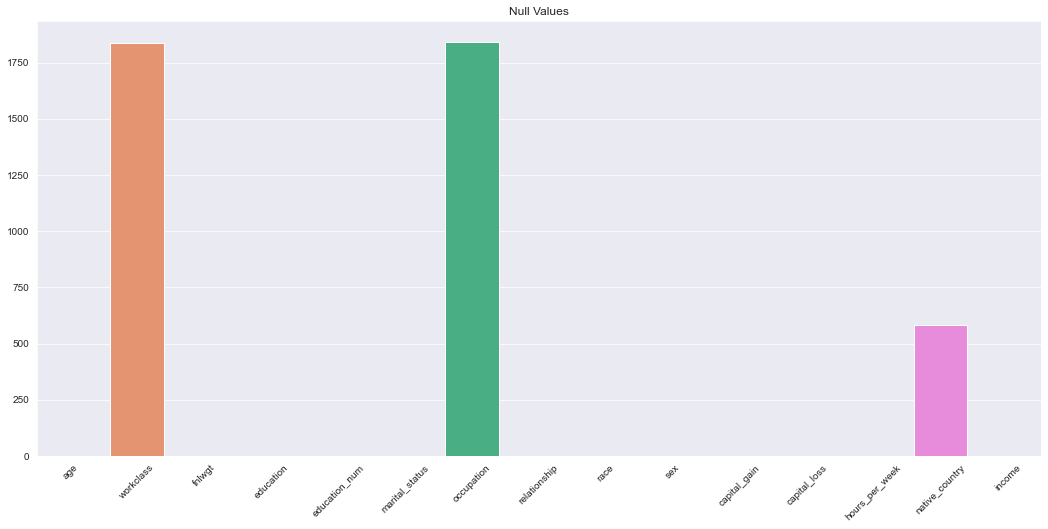

In [18]:
#Check the number of null values
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.title('Null Values')
plt.show()

In [19]:
#Now we need to check if the numerical columns we are using have null values
adult_df[numerical_col].info()
#And it does not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   capital_gain    32561 non-null  int64
 4   capital_loss    32561 non-null  int64
 5   hours_per_week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


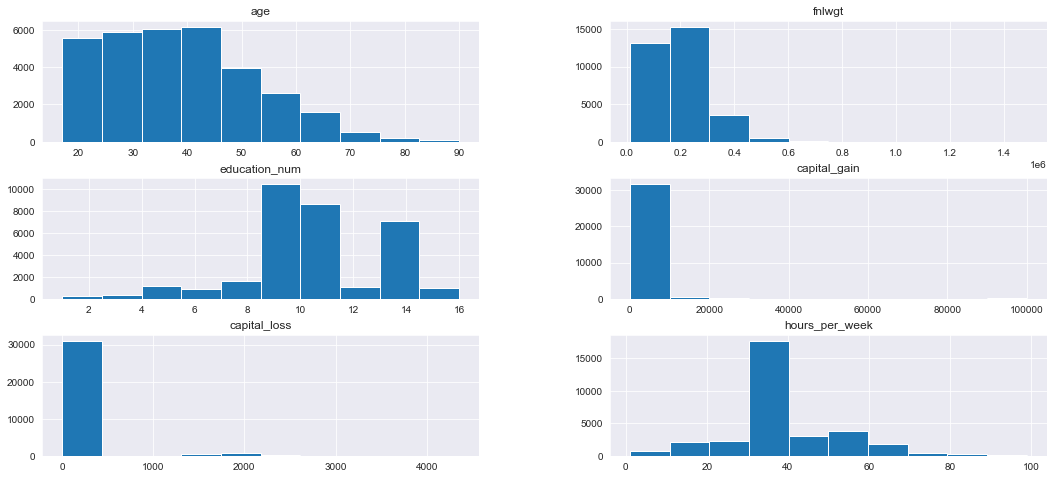

In [20]:
#Now we can graph out the numerical columns
adult_df[numerical_col].hist()
plt.show()

In [21]:
#################################################### PRE-PROCESSING ###########################################################

In [22]:
#While there are many ways to handle missing values, here we will use the most common/frequent variable to replace missing values

adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

In [23]:
#Now we will encode the categories
# We can use hot encoding here because there is no order in the categorical data

adult_df = pd.get_dummies(data=adult_df, columns=categorical_col, drop_first=True)
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Mapping out our variables to a scale (Similar to KNN). We use Robust Scaler here because it scale using statistics that are 
# robust to outliers

from sklearn.preprocessing import RobustScaler

X = adult_df.drop('income_ >50K', axis = 1)
y = adult_df['income_ >50K']

print(X)
print(y)

       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass_ Local-gov

In [25]:
#Creating scalar object
scaler = RobustScaler()

#Transform X with scaler
X_scaled = scaler.fit_transform(X[numerical_col])
X[numerical_col] = X_scaled

In [26]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X.describe()
#Capital loss and capital gain is still very big??

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.079082,0.095806,0.026893,1077.648844,87.303830,0.087491,0.064279,0.000215,0.753417,0.034274,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913762,0.002058,0.000491
std,0.682022,0.885308,0.857573,7385.292085,402.960219,2.469486,0.245254,0.014661,0.431029,0.181935,...,0.033691,0.059068,0.019194,0.049507,0.039546,0.023506,0.024149,0.280720,0.045316,0.022162
min,-1.000000,-1.392933,-3.000000,0.000000,0.000000,-7.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.450000,-0.507691,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.550000,0.492309,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.650000,10.957098,2.000000,99999.000000,4356.000000,11.800000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
################################################### CREATING MODEL ############################################################

In [29]:
#Split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
################################################# MODEL EVALUATION AND CONFUSION MATRIX ########################################

In [32]:
y_pred = gnb.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f})'.format(accuracy_score(y_test, y_pred)))

#Worst performance in terms of accuracy then 0.3 test split

Model accuracy score: 0.8207)


In [34]:
#Confusion matrix result
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion atrix\n\n', cm)
print('\nTrue positives(TP) = ', cm[0,0])
print('\nTrue negatives(TN) = ', cm[1,1])
print('\nFalse positives(FP) = ', cm[0,1])
print('\nFalse negatives(FN) = ',cm[1,0])


Confusion atrix

 [[3200  555]
 [ 321  809]]

True positives(TP) =  3200

True negatives(TN) =  809

False positives(FP) =  555

False negatives(FN) =  321


In [35]:
#Applying 10-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Cross-validation scores:{}'.format(scores))

#Compute average score
print('\nAverage Cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.82044798 0.8175578  0.82369942 0.82947977 0.83273121 0.81647399
 0.83447777 0.82363571 0.83014095 0.82435851]

Average Cross-validation score: 0.8253


In [36]:
#Applying 20-fold cross validation to see if we get better result
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 20, scoring = 'accuracy')
print('Cross-validation scores:{}'.format(scores))

#Compute average score
print('\nAverage Cross-validation score: {:.4f}'.format(scores.mean()))


#=>Similar result

Cross-validation scores:[0.8150289  0.82731214 0.82080925 0.81791908 0.83020231 0.81575145
 0.8265896  0.83236994 0.83020231 0.83020231 0.81430636 0.81864162
 0.84031792 0.83020231 0.83453757 0.81069364 0.83803326 0.82357195
 0.82935647 0.82140275]

Average Cross-validation score: 0.8254


In [37]:
#Change train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f})'.format(accuracy_score(y_test, y_pred)))
#Getting worst performance.
# => The best range is around 0.3 for this model

Model accuracy score: 0.8261)
